In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 30)

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [207]:
target_pts = 13.5

In [208]:
linear_reg = LinearRegression()
lasso_cv = LassoCV()
lasso = Lasso()
ridge_cv = RidgeCV()
ridge_reg = Ridge()
elastic_cv = ElasticNetCV()
elastic_net = ElasticNet()
bayesian_ridge = BayesianRidge()
log_regression = LogisticRegression()
sgd_reg = SGDRegressor()
scaler = StandardScaler()

In [209]:
df = pd.read_csv('modeling_data.csv', index_col=[0,1])
df2 = df.copy()

In [210]:
X, y =  df2.drop(columns=['PTS_x', 'FGM_x', 'FTM_x', 'FG3M_x']), df['PTS_x']
#y = y.apply(lambda x: 1 if x > target_pts else 0)

In [211]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=2)
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.fit_transform(X_val.values)

In [212]:
alphavec = 10**np.linspace(-2,2,200)

lasso_cv = LassoCV(alphas = alphavec, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [213]:
lasso_cv.alpha_

0.29331662783900436

In [214]:
for col, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

FGA_x           :    1.9778024
FG_PCT_x        :    3.5186803
FG3A_x          :    1.3490603
FG3_PCT_x       :    0.5133775
FTA_x           :    1.8812035
FT_PCT_x        :    0.0477300
OREB_x          :    0.0000000
DREB_x          :    0.0000000
REB_x           :    0.0000000
AST_x           :   -0.0000000
STL_x           :    0.0000000
BLK_x           :    0.0000000
TOV_x           :    0.0000000
PF_x            :    0.2564691
PLUS_MINUS_x    :    0.0000000
HOME_x          :   -0.0000000
MIN_y           :    0.0000000
FGM_y           :    0.0000000
FGA_y           :    0.0000000
FG_PCT_y        :   -0.0000000
FG3M_y          :    0.0289181
FG3A_y          :    0.0000000
FG3_PCT_y       :    0.2315494
FTM_y           :    0.0000000
FTA_y           :    0.0000000
FT_PCT_y        :    0.0000000
OREB_y          :    0.0000000
DREB_y          :   -0.0000000
REB_y           :   -0.0000000
AST_y           :   -0.0000000
STL_y           :   -0.0000000
BLK_y           :   -0.0000000
TOV_y   

In [215]:
print('R2 for LassoCV Model on train set: ' + str(lasso_cv.score(X_train_scaled, y_train)))

R2 for LassoCV Model on train set: 0.9693350006324178


In [216]:
val_set_preds = lasso_cv.predict(X_val_scaled)


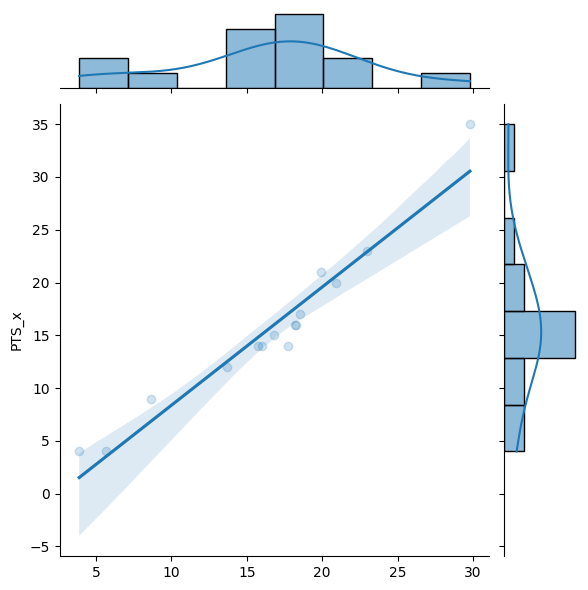

In [217]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


In [218]:
print('R2 for LassoCV Model on validation set: ' + str(lasso_cv.score(X_val_scaled, y_val)))


R2 for LassoCV Model on validation set: 0.9120444915295438


In [219]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for LassoCV model on validation set: ' + str(mae))

Mean absolute error for LassoCV model on validation set: 1.76009794441447


In [220]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for LassoCV model on validation set: ' + str(rmse))

Root mean squared error for LassoCV model on validation set: 2.186877724191945


c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [221]:
df3 = df[['PTS_x','FGA_x', 'FG_PCT_x', 'FG3A_x', 'FG3_PCT_x', 'FG3_PCT_x', 'FTA_x', 'FT_PCT_x', 'PF_x', 'FG3M_y', 'FG3_PCT_y', 'FGM', 'rolling_avg', 'rolling_fta', 'OPPONENT_x_ATL', 'OPPONENT_x_NYK', 'OPPONENT_x_SAC']]
X, y = df3.drop(columns=['PTS_x']), df['PTS_x']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
linear_reg.fit(X_train, y_train)

KeyError: "['PTS_x' 'FGM_x' 'FTM_x' 'FG3'] not found in axis"

In [ ]:
print('R2 Score for Simple Linear Regression on Training Set using selected features: ' + str(linear_reg.score(X_train, y_train)))


R2 Score for Simple Linear Regression on Training Set using selected features: 1.0


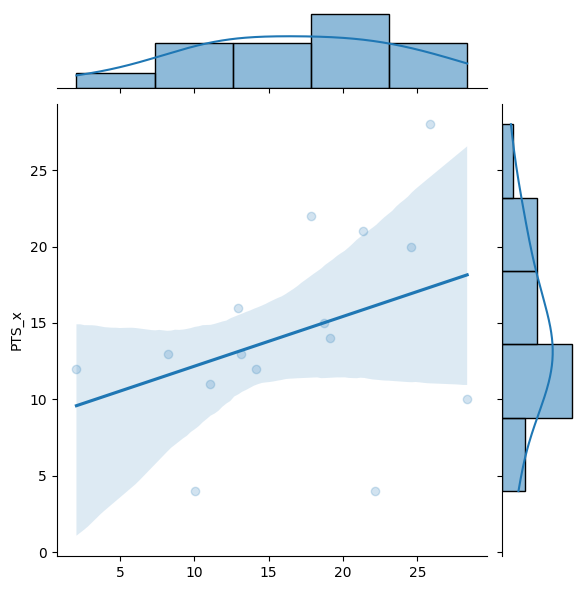

In [ ]:
val_set_preds = linear_reg.predict(X_val)
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [ ]:
linear_reg.fit(X_train_val, y_train_val)


LinearRegression()

In [ ]:
test_set_preds = linear_reg.predict(X_test)


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
val_set_preds = lr_poly.predict(X_val_poly)
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Polynomial Regression model on validation set: ' + str(mae))
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Polynomial Regression model on validation set: ' + str(rmse))
for name, coef in zip(poly.get_feature_names_out(), lr_poly.coef_):
    print(f"{name:<6}: {coef: .3f}")

Mean absolute error for Polynomial Regression model on validation set: 5.478356007593207
Root mean squared error for Polynomial Regression model on validation set: 6.566282883758655
1     :  0.000
FGA_x :  0.000
FG_PCT_x:  0.000
FG3A_x:  0.000
FG3_PCT_x: -0.000
FTA_x :  0.000
FT_PCT_x:  0.000
OREB_x: -0.000
DREB_x:  0.000
REB_x : -0.000
AST_x : -0.000
STL_x :  0.000
BLK_x : -0.000
TOV_x :  0.000
PF_x  :  0.000
PLUS_MINUS_x: -0.000
HOME_x: -0.000
MIN_y :  0.000
FGM_y :  0.000
FGA_y : -0.000
FG_PCT_y: -0.000
FG3M_y:  0.000
FG3A_y: -0.000
FG3_PCT_y:  0.000
FTM_y :  0.000
FTA_y : -0.000
FT_PCT_y: -0.000
OREB_y:  0.000
DREB_y: -0.000
REB_y :  0.000
AST_y : -0.000
STL_y :  0.000
BLK_y : -0.000
TOV_y :  0.000
PF_y  : -0.000
PTS_y : -0.000
PLUS_MINUS_y: -0.000
MIN   : -0.000
FGM   : -0.000
FGA   : -0.000
FG_PCT: -0.000
FG3M  : -0.000
FG3A  : -0.000
FG3_PCT: -0.000
FTM   :  0.000
FTA   : -0.000
FT_PCT:  0.000
OREB  : -0.000
DREB  :  0.000
REB   : -0.000
AST   : -0.000
STL   : -0.000
BLK   : -0.

c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = 5)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e-01, tolerance: 1.419e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e-01, tolerance: 1.426e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Best Score:  -2.226765248378293
Best Param:  {'alpha': 0.0001}


c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e-01, tolerance: 1.716e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
elastic_cv = ElasticNetCV(alphas = [0.0021544346900318843], cv=5, random_state=0);
elastic_cv.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score on training data: ', elastic_cv.score(X_train, y_train))

ElasticNet Mean R Squared Score on training data:  0.9999840213129378


c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.169e-01, tolerance: 1.419e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.559e-01, tolerance: 1.260e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\129772\Desktop\props.ai\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [ ]:
val_set_preds = elastic_cv.predict(X_val)

In [ ]:
lr_preds = linear_reg.predict(X); lr_preds
df['predictions'] = lr_preds; df

,,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,FG3_PCT_x,FTM_x,FTA_x,FT_PCT_x,OREB_x,DREB_x,REB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,PLUS_MINUS_x,HOME_x,MIN_y,FGM_y,FGA_y,FG_PCT_y,FG3M_y,FG3A_y,FG3_PCT_y,FTM_y,FTA_y,FT_PCT_y,OREB_y,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,PLUS_MINUS_y,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,days_rest,rolling_avg,rolling_3pa_avg,min_rolling,rolling_team_fta,rolling_opp_pts,rolling_opp_fga,rolling_team_fga,rolling_fga,rolling_fta,rolling_team_3pa,rolling_team_pts,rolling_team_fg_pct,rolling_stls,TEAM_x_LAC,OPPONENT_x_ATL,OPPONENT_x_BKN,OPPONENT_x_BOS,OPPONENT_x_CHA,OPPONENT_x_CHI,OPPONENT_x_CLE,OPPONENT_x_DAL,OPPONENT_x_DEN,OPPONENT_x_DET,OPPONENT_x_GSW,OPPONENT_x_HOU,OPPONENT_x_IND,OPPONENT_x_LAL,OPPONENT_x_MEM,OPPONENT_x_MIA,OPPONENT_x_MIL,OPPONENT_x_MIN,OPPONENT_x_NOP,OPPONENT_x_NYK,OPPONENT_x_OKC,OPPONENT_x_ORL,OPPONENT_x_PHI,OPPONENT_x_PHX,OPPONENT_x_POR,OPPONENT_x_SAC,OPPONENT_x_SAS,OPPONENT_x_TOR,OPPONENT_x_UTA,OPPONENT_x_WAS,WL_x_L,WL_x_W,predictions
,MIN_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10,1,4,0.250,0,2,0.000,2,3,0.667,0,0,0,5,0,0,1,0,4,8,True,240,43,96,0.448,10,39,0.256,13,19,0.684,20,24,44,23,9,7,13,17,109,-1,240,41,88,0.466,6,35,0.171,22,25,0.880,14,32,46,26,7,4,18,14,110,1,2.225352,4.00,2.000000,10.00,19.000000,110.0,88.0,96.000000,4.000000,3.00,39.000000,109.0,0.448000,7.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,4.000000
1,26,6,11,0.545,4,8,0.500,6,6,1.000,0,5,5,5,0,0,2,3,22,-20,True,240,41,84,0.488,14,35,0.400,24,24,1.000,11,37,48,26,5,2,16,22,120,2,240,42,88,0.477,11,30,0.367,23,27,0.852,7,29,36,27,10,2,11,16,118,-2,5.000000,13.00,5.000000,18.00,21.500000,114.0,88.0,90.000000,7.500000,4.50,37.000000,114.5,0.468000,8.500000,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,22.000000
2,33,4,10,0.400,2,7,0.286,3,3,1.000,0,10,10,15,0,0,5,1,13,19,True,240,51,91,0.560,13,35,0.371,16,18,0.889,8,43,51,32,9,4,15,22,131,29,240,35,91,0.385,9,30,0.300,23,29,0.793,14,29,43,20,11,4,15,16,102,-29,2.000000,13.00,5.666667,23.00,20.333333,110.0,89.0,90.333333,8.333333,4.00,36.333333,120.0,0.498667,9.333333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,13.000000
3,38,6,23,0.261,2,13,0.154,6,7,0.857,1,5,6,8,1,0,1,0,20,4,True,240,34,90,0.378,7,33,0.212,27,32,0.844,7,41,48,22,10,2,7,20,102,2,240,36,83,0.434,11,35,0.314,17,25,0.680,6,45,51,27,3,4,14,19,100,-2,1.000000,14.75,7.500000,26.75,23.250000,107.5,87.5,90.250000,12.000000,4.75,35.500000,115.5,0.468500,7.750000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,20.000000
4,31,1,7,0.143,1,5,0.200,3,4,0.750,1,4,5,8,1,0,5,0,6,-13,False,240,31,76,0.408,11,27,0.407,22,27,0.815,9,29,38,18,6,1,16,21,95,-14,240,39,92,0.424,12,42,0.286,19,25,0.760,20,36,56,29,10,6,10,18,109,14,2.000000,13.00,7.000000,27.60,24.000000,107.8,88.4,87.400000,11.000000,4.60,33.800000,111.4,0.456400,8.200000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,8.662263
5,36,1,3,0.333,1,3,0.333,3,4,0.750,0,6,6,10,1,0,0,0,6,6,False,240,43,75,0.573,14,29,0.483,30,34,0.882,7,34,41,28,4,5,10,16,130,12,240,44,88,0.500,23,52,0.442,7,11,0.636,5,26,31,32,3,2,9,25,118,-12,2.000000,13.40,7.200000,32.80,27.000000,109.4,88.4,83.200000,10.800000,4.80,31.800000,115